In [1]:
#import libraries

from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Re-size all the images to this format

IMAGE_SIZE = [224,224]

#Train data(images) path
train_path = 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training'
#Test data(images) path
valid_path= 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Testing'

# Add Preprocessing layer to the front of VGG16

In [3]:
vgg16 = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top = False)

#dont train existing weights
for layer in vgg16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 5s 0us/step


In [4]:
#Getting number of classes

folders = glob('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training/*')

In [5]:
folders

['C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training\\Cat',
 'C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training\\Dog']

In [6]:
# Our layers - you can add more layers if you want
x = Flatten()(vgg16.output)

#Define the output layer
predicition = Dense(len(folders),activation='softmax')(x)

# Create a model object

In [7]:
model = Model(inputs=vgg16.input,outputs=predicition)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
#Tell the model what cost and optimization method to use

model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [9]:
#To perform image agumentation 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set = train_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Training',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
print('*'*75)


#Testing set
print('Testing Samples:\n')
test_set = test_datagen.flow_from_directory('C:/Users/manthan mankar/MLA-Training/Deep Learning/Day_6/Cnn_data/Testing',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Training length:

Found 600 images belonging to 2 classes.
***************************************************************************
Testing Samples:

Found 120 images belonging to 2 classes.


# Train the model

In [10]:
r = model.fit(training_set,
             validation_data=test_set,
             epochs = 10,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))

Epoch 1/10
19/19 [==============================] - 283s 15s/step - loss: 0.8651 - accuracy: 0.6067 - val_loss: 0.4545 - val_accuracy: 0.7750
Epoch 2/10
19/19 [==============================] - 279s 15s/step - loss: 0.3219 - accuracy: 0.8650 - val_loss: 0.2931 - val_accuracy: 0.8917
Epoch 3/10
19/19 [==============================] - 286s 15s/step - loss: 0.1619 - accuracy: 0.9317 - val_loss: 0.2591 - val_accuracy: 0.9083
Epoch 4/10
19/19 [==============================] - 288s 15s/step - loss: 0.1133 - accuracy: 0.9667 - val_loss: 0.2401 - val_accuracy: 0.8917
Epoch 5/10
19/19 [==============================] - 284s 15s/step - loss: 0.0834 - accuracy: 0.9850 - val_loss: 0.2297 - val_accuracy: 0.9083
Epoch 6/10
19/19 [==============================] - 281s 15s/step - loss: 0.0553 - accuracy: 0.9967 - val_loss: 0.2322 - val_accuracy: 0.8917
Epoch 7/10
19/19 [==============================] - 280s 15s/step - loss: 0.0525 - accuracy: 0.9917 - val_loss: 0.2298 - val_accuracy: 0.8833
Epoch 

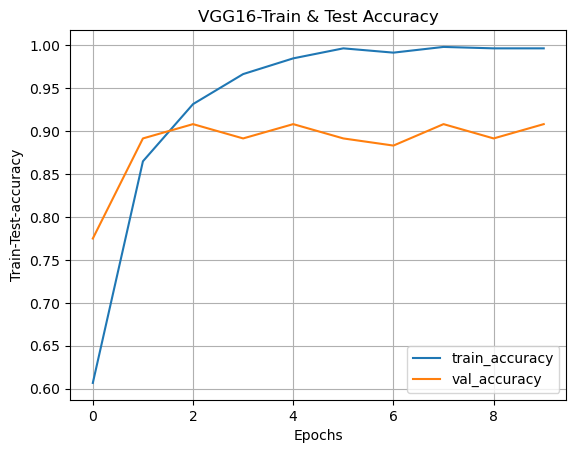

<Figure size 640x480 with 0 Axes>

In [11]:
#Accuracy
plt.title('VGG16-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test-accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG16--Accuracy & Val_Accuracy')

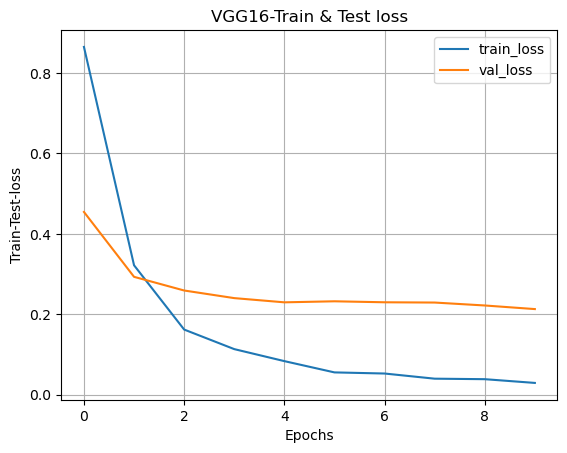

<Figure size 640x480 with 0 Axes>

In [12]:
#loss
plt.title('VGG16-Train & Test loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test-loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('VGG16--Loss & Val_loss')

In [13]:
import tensorflow as tf
from keras.models import load_model
model.save('VGG16_dog_cat_classif.keras')

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypred = model.predict(test_set,100//5)
ypred = np.argmax(ypred,axis=1)
print('Confusion Matrix:')
print(confusion_matrix(test_set.classes,ypred))
print('*'*75)
print('Classification Report:')
print(classification_report(test_set.classes,ypred,target_names=['Cat','Dog']))
print('*'*75)
print(accuracy_score(test_set.classes,ypred))

4/4 [==============================] - 46s 11s/step
Confusion Matrix:
[[31 29]
 [28 32]]
***************************************************************************
Classification Report:
              precision    recall  f1-score   support

         Cat       0.53      0.52      0.52        60
         Dog       0.52      0.53      0.53        60

    accuracy                           0.53       120
   macro avg       0.53      0.53      0.52       120
weighted avg       0.53      0.53      0.52       120

***************************************************************************
0.525


<Axes: >

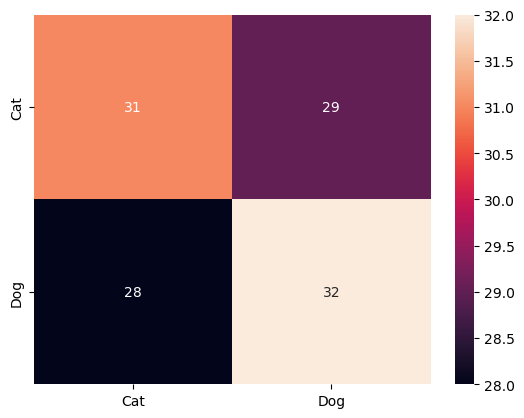

In [16]:
import seaborn as sns

sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['Cat','Dog'],
           yticklabels=['Cat','Dog'])